<a href="https://colab.research.google.com/github/DiegoCabreraOsorio/r-study/blob/main/Clase_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#CH.3: Visualización de datos

Uso de ggplot2

Comenzamos por cargar el paquete "tidyverse":

In [ ]:
install.packages("tidyverse")

Con esto vemos conflictos, y paquetes de la librería:

In [3]:
library(tidyverse)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.2
✔ ggplot2   4.0.0     ✔ tibble    3.3.0
✔ lubridate 1.9.4     ✔ tidyr     1.3.1
✔ purrr     1.1.0     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


##ggplot2

ggplot2 es de los paquetes para hacer gráficos más elegantes y versátiles. Es --imagino-- el equivalente a *pandas* en Python.




In [5]:
install.packages("datos")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘gapminder’




In [6]:
library(datos)

Aquí llamamos al dataframe "millas" dentro de la librería "datos", esa es la sintaxis que utilizamos aquí!

In [8]:
df = datos::millas

### Primer gráfico con ggplot:
Aquí, la función *geom_point()* genera un scatter plot.

Cada función geom en ggplot2 tiene un argumento de mapping. Este define cómo se “mapean” o se asignan las variables del conjunto de datos a propiedades visuales. El argumento de mapping siempre aparece emparejado con aes() y los argumentos x e y dentro de aes() especifican qué variables asignar a estos ejes. ggplot2 busca la variable asignada en el argumento data, en este caso, millas.

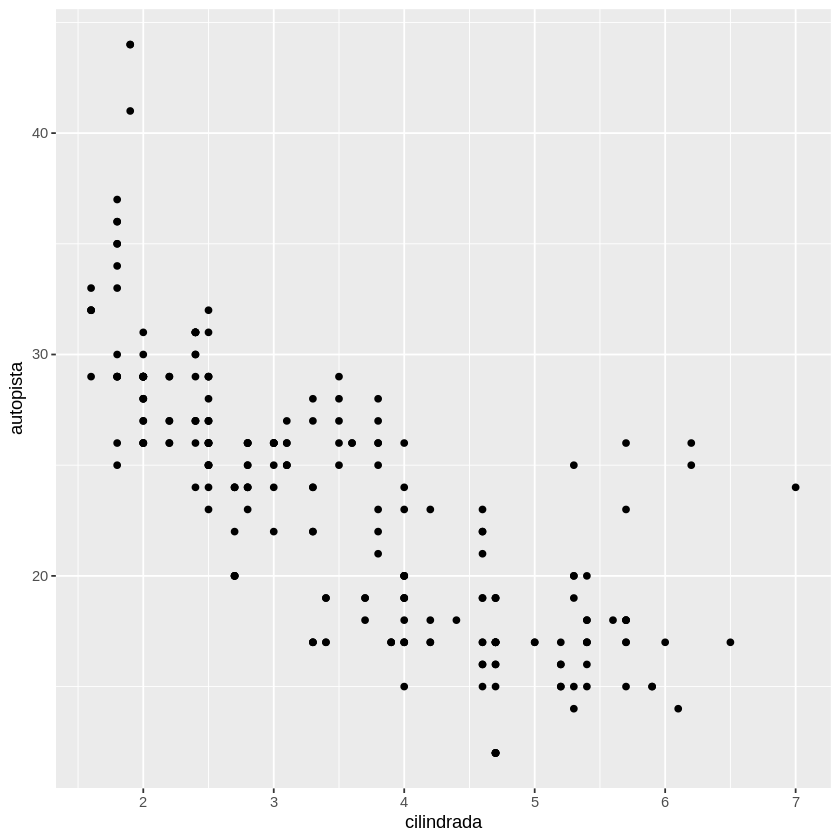

In [11]:
ggplot(data = millas) +
  geom_point(mapping = aes(x = cilindrada, y = autopista))

Si ejecutamos simplemente ggplot(), obtenemos un gráfico en blanco.

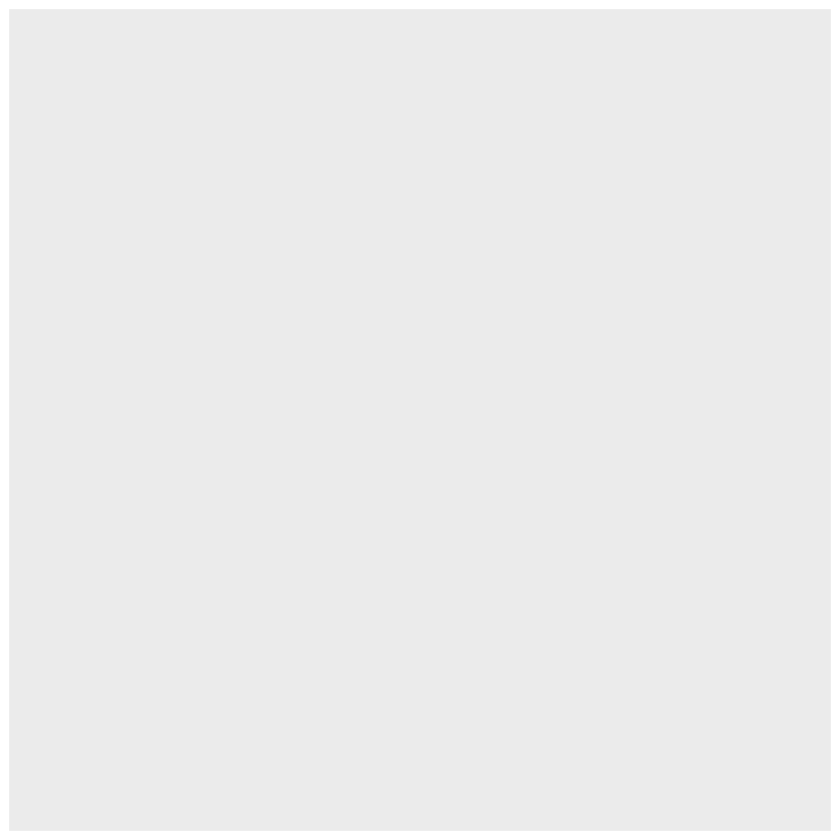

In [12]:
ggplot(data = millas)

Con la función *summary()* obtengo la info de mi dataframe. Es análoga al *df.info()* que teníamos con Pandas, en Python.

In [13]:
summary(df)

  fabricante           modelo            cilindrada         anio     
 Length:234         Length:234         Min.   :1.600   Min.   :1999  
 Class :character   Class :character   1st Qu.:2.400   1st Qu.:1999  
 Mode  :character   Mode  :character   Median :3.300   Median :2004  
                                       Mean   :3.472   Mean   :2004  
                                       3rd Qu.:4.600   3rd Qu.:2008  
                                       Max.   :7.000   Max.   :2008  
   cilindros     transmision          traccion             ciudad     
 Min.   :4.000   Length:234         Length:234         Min.   : 9.00  
 1st Qu.:4.000   Class :character   Class :character   1st Qu.:14.00  
 Median :6.000   Mode  :character   Mode  :character   Median :17.00  
 Mean   :5.889                                         Mean   :16.86  
 3rd Qu.:8.000                                         3rd Qu.:19.00  
 Max.   :8.000                                         Max.   :35.00  
   autopista 

Con la siguiente línea, obtenemos información sobre el paquete (en este caso, un dataframe)

In [14]:
?millas

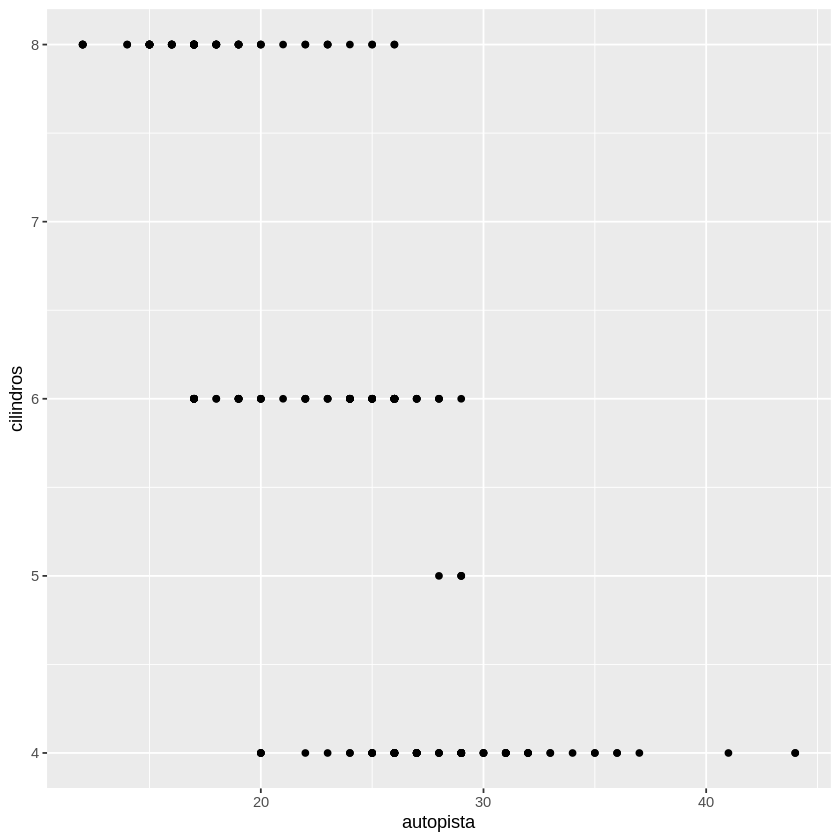

In [15]:
ggplot(data = millas) +
  geom_point(mapping = aes(x = autopista, y = cilindros))

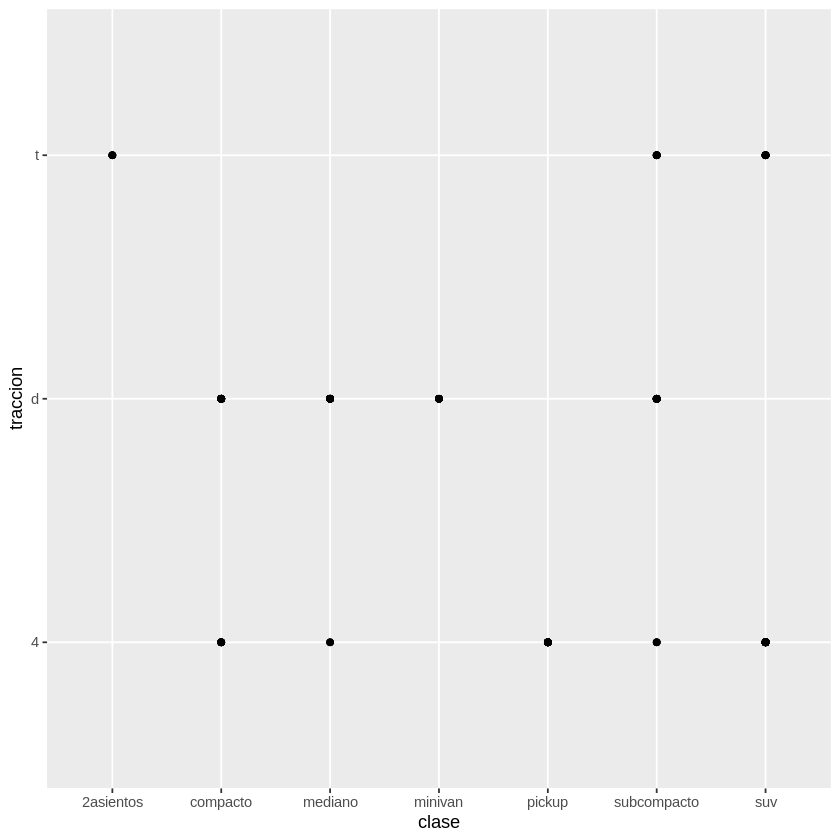

In [16]:
ggplot(data = millas) +
  geom_point(mapping = aes(x=clase,y=traccion ))

Este gráfico en cuestión no es útil, pues estamos comparando dos variables discretas que no entregan demasiada información.

### Mapeos estéticos

Por ejemplo, si estamos graficando "x" versus "y", y queremos saber cómo se comportan ciertos puntos de "x" que se salen de la media, por ejemplo, podemos agregar una nueva forma de graficar, asignándoles un parámetro estético a las variables en cuestión. Veamos el siguiente ejemplo.

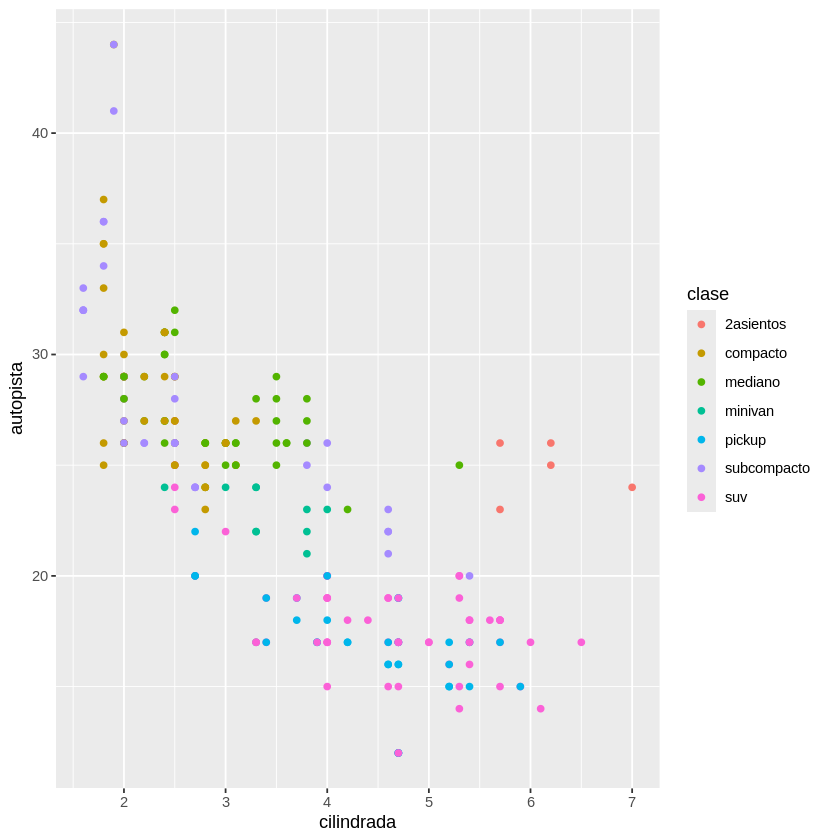

In [23]:
ggplot(data = millas) +
  geom_point(mapping = aes(x = cilindrada, y = autopista, color = clase))

Warning message:
“Using alpha for a discrete variable is not advised.”
Warning message:
“The shape palette can deal with a maximum of 6 discrete values because more
than 6 becomes difficult to discriminate
ℹ you have requested 7 values. Consider specifying shapes manually if you need
  that many of them.”
Warning message:
“Removed 62 rows containing missing values or values outside the scale range
(`geom_point()`).”


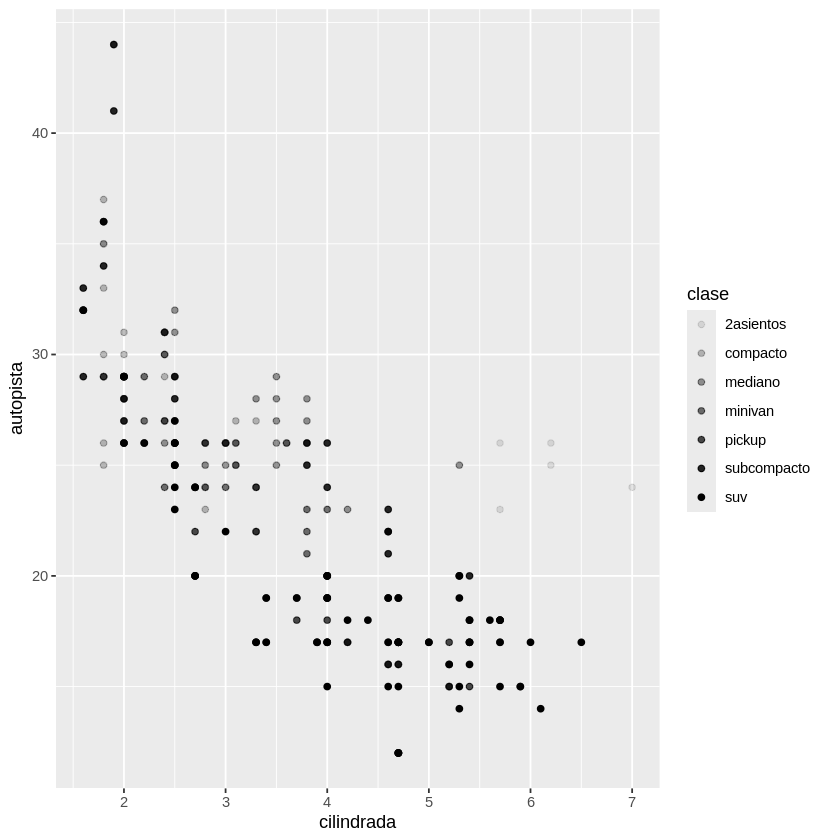

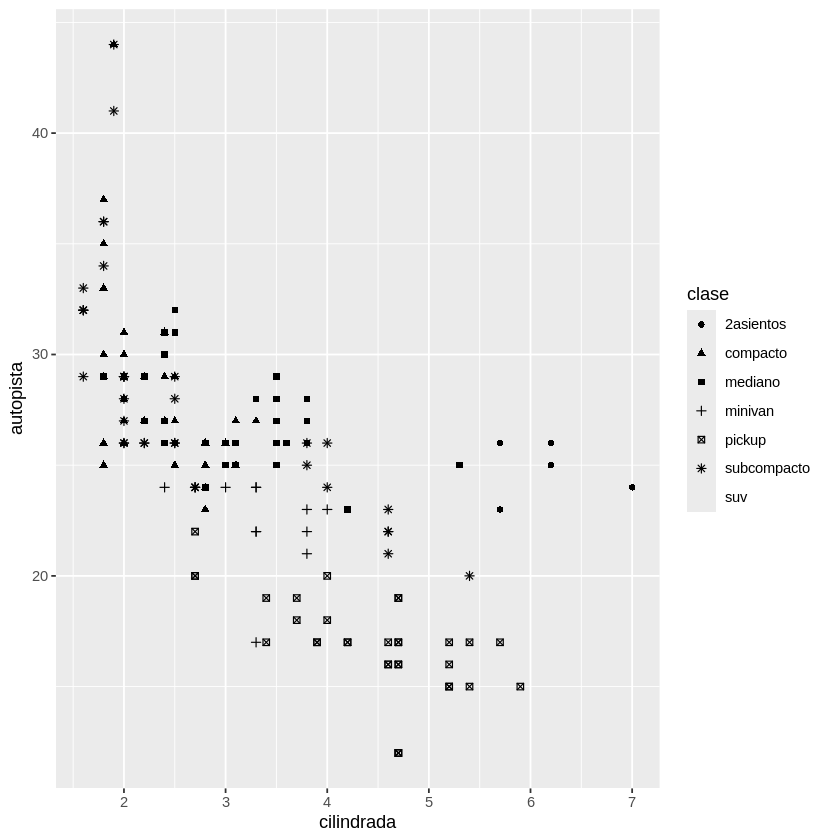

In [18]:
# Izquierda
ggplot(data = millas) +
  geom_point(mapping = aes(x = cilindrada, y = autopista, alpha = clase))

# Derecha
ggplot(data = millas) +
  geom_point(mapping = aes(x = cilindrada, y = autopista, shape = clase))

In [25]:
str(df)

tibble [234 × 11] (S3: tbl_df/tbl/data.frame)
 $ fabricante : chr [1:234] "audi" "audi" "audi" "audi" ...
 $ modelo     : chr [1:234] "a4" "a4" "a4" "a4" ...
 $ cilindrada : num [1:234] 1.8 1.8 2 2 2.8 2.8 3.1 1.8 1.8 2 ...
 $ anio       : int [1:234] 1999 1999 2008 2008 1999 1999 2008 1999 1999 2008 ...
 $ cilindros  : int [1:234] 4 4 4 4 6 6 6 4 4 4 ...
 $ transmision: chr [1:234] "auto(l5)" "manual(m5)" "manual(m6)" "auto(av)" ...
 $ traccion   : chr [1:234] "d" "d" "d" "d" ...
 $ ciudad     : int [1:234] 18 21 20 21 16 18 18 18 16 20 ...
 $ autopista  : int [1:234] 29 29 31 30 26 26 27 26 25 28 ...
 $ combustible: chr [1:234] "p" "p" "p" "p" ...
 $ clase      : chr [1:234] "compacto" "compacto" "compacto" "compacto" ...


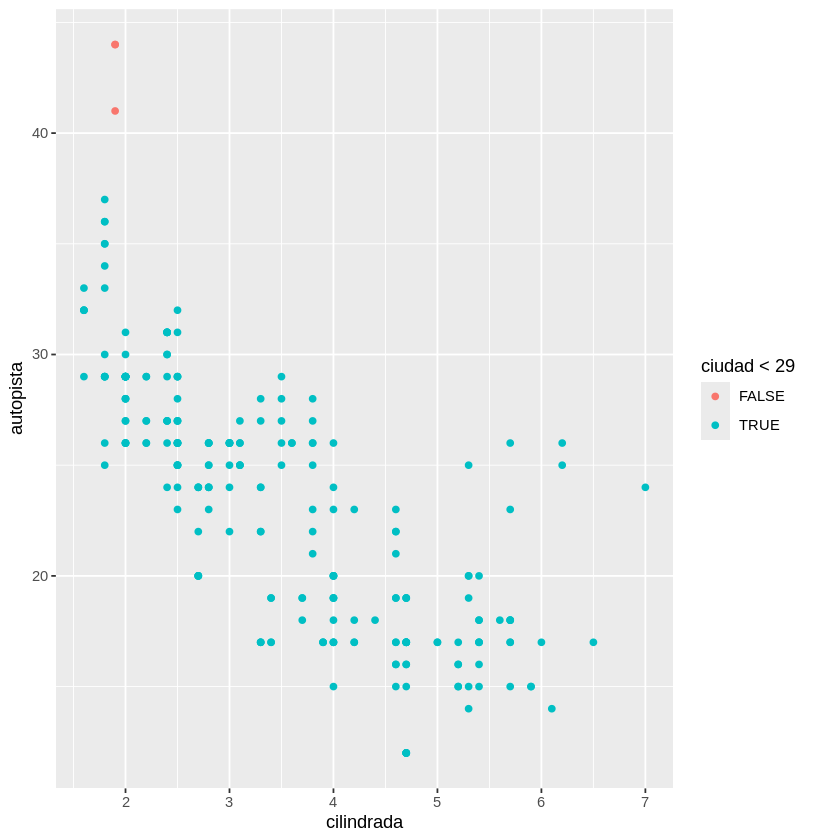

In [28]:
ggplot(data = millas)+
  geom_point(mapping = aes(x = cilindrada, y=autopista, color = ciudad < 29))

### Separar por clases

En estos casos, el uso de la función *facet_wrap()* debe ser sobre variables **categóricas!**

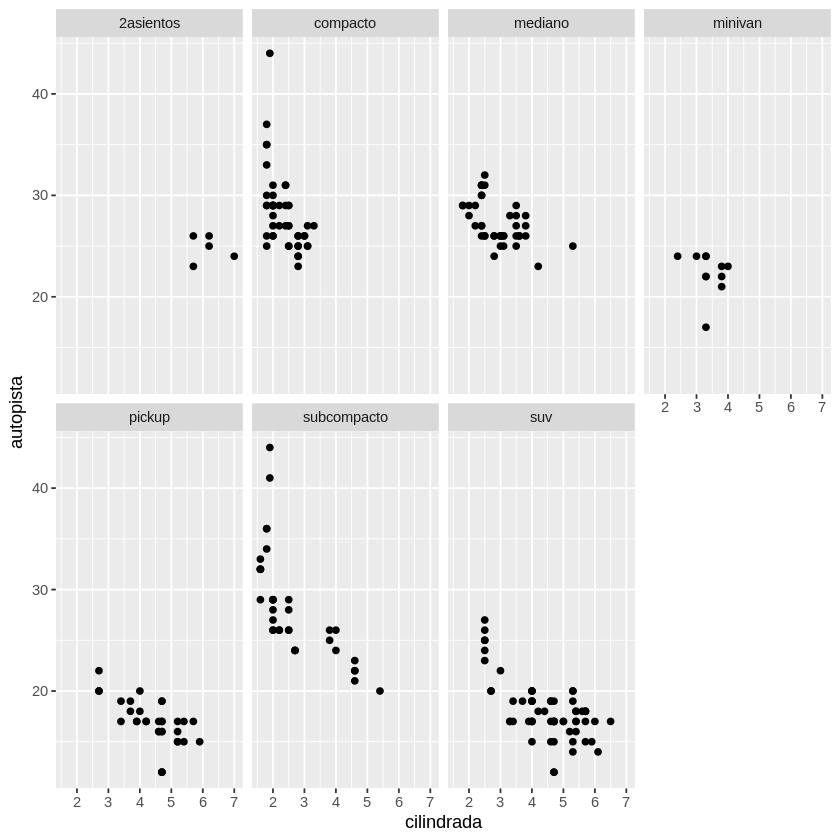

In [29]:
ggplot(data = millas) +
  geom_point(mapping = aes(x = cilindrada, y = autopista)) +
  facet_wrap(~ clase, nrow = 2)

También se puede hacer para más de una categoría, en este caso, estamos graficando cilindrada vs autopista, pero tenemos un gráfico por grada combinación de tracción y cilindrada:

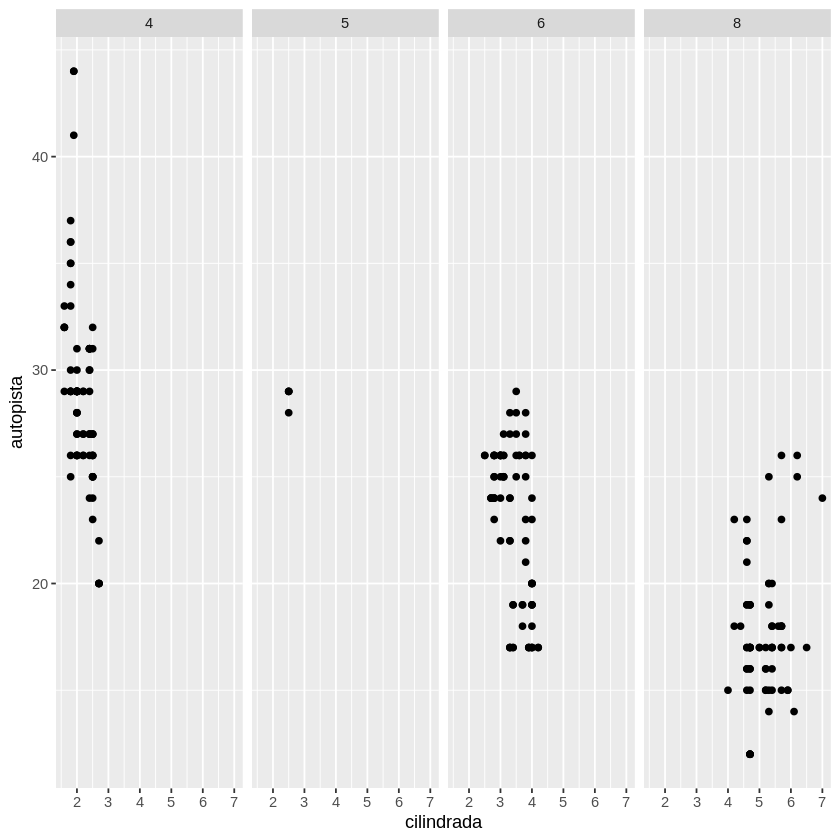

In [33]:
ggplot(data = millas) +
  geom_point(mapping = aes(x = cilindrada, y = autopista)) +
  facet_grid(. ~ cilindros)

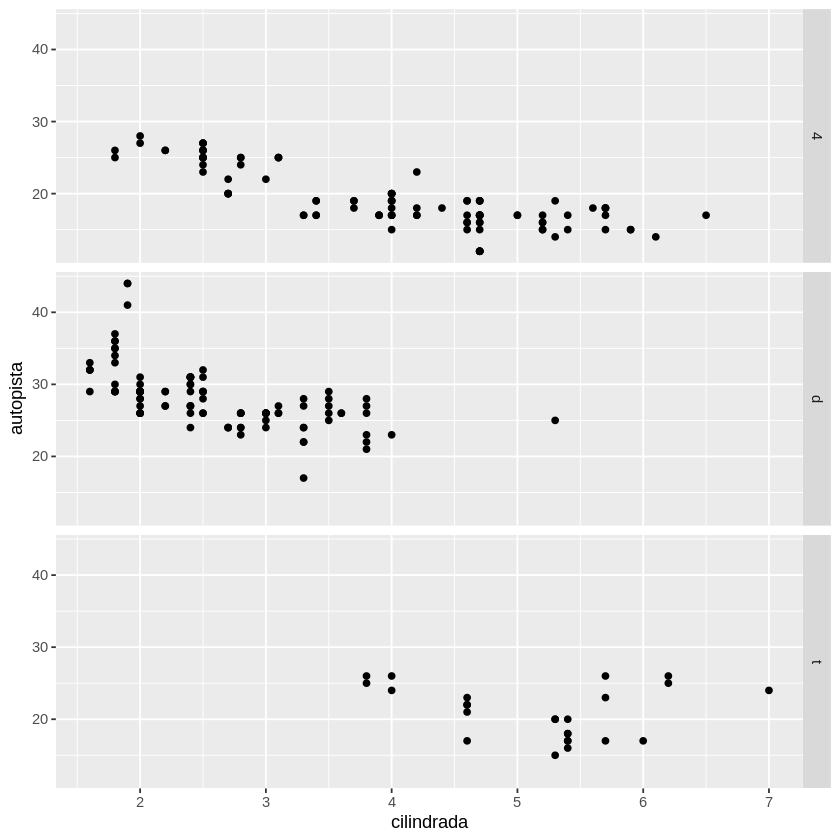

In [34]:
ggplot(data = millas) +
  geom_point(mapping = aes(x = cilindrada, y = autopista)) +
  facet_grid(traccion ~ .)

In [35]:
?facet_wrap

La próxima clase continúa en: [Objetos geométricos](https://es.r4ds.hadley.nz/03-visualize.html#objetos-geom%C3%A9tricos)